# Linear Regression

This notebook discusses linear regression.




In [2]:
# %load ../preface.py
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from IPython.core.debugger import set_trace

# setup matplotlib
mpl.rcParams['font.family']='monospace'
mpl.rcParams['font.monospace']='Fira Mono'
mpl.rcParams['font.size']=14.0
mpl.rcParams['figure.figsize']=[8,6]

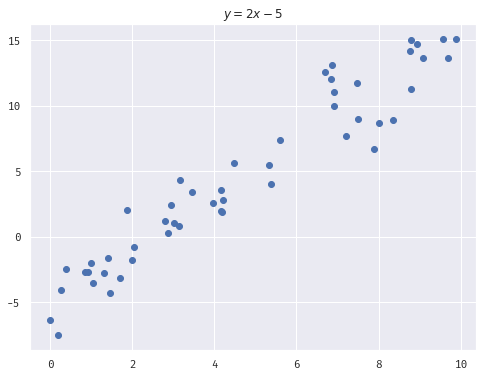

In [6]:
rng=np.random.RandomState(1)
# return one dimensional, uniformly distributed (0, 10)
x = 10*rng.rand(50)
y = 2 * x - 5 + rng.randn(50) * 2
plt.scatter(x,y)
plt.title(r'$y = 2x - 5$')
plt.savefig("linear-2x-5.pdf", bbox_inches = 'tight', pad_inches=0)

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))



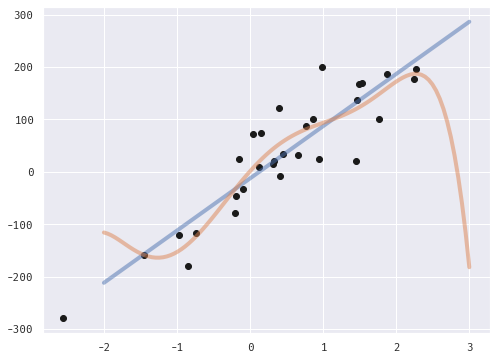

In [4]:
X,y = make_regression(n_samples=30, n_features=1, n_informative = 1, noise=60, random_state=0)
X_test = np.linspace(-2,3,100)[:, None]

plt.scatter(X, y, color='k')

for degree in [1, 6]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, alpha=0.5, linewidth=4)
    
# xfit = np.linspace(-2, 3, 20)
# yfit = model.predict(xfit[:,None])
# plt.plot(xfit, yfit, color='r', alpha=0.5, linewidth=4)
# plt.savefig("linear.pdf")

In [5]:
xfit[:,None]

NameError: name 'xfit' is not defined

## Fit, degree = 2

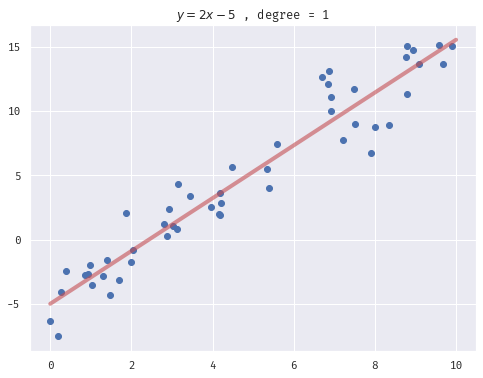

In [7]:
rng=np.random.RandomState(1)
X = 10*rng.rand(50)[:,None]
y = 2 * x - 5 + rng.randn(50) * 2
plt.scatter(X,y)
plt.title(r'$y = 2x - 5$' + " , degree = 1")
X_test = np.linspace(0,10,100)[:,None]
y_test = PolynomialRegression(1).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='r', alpha=0.6, linewidth=4)
    
plt.savefig("linear-2x-5-degree1.pdf", bbox_inches = 'tight', pad_inches=0)


In [8]:
np.random.RandomState.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      method_descriptor


## Overfit, degree = 10

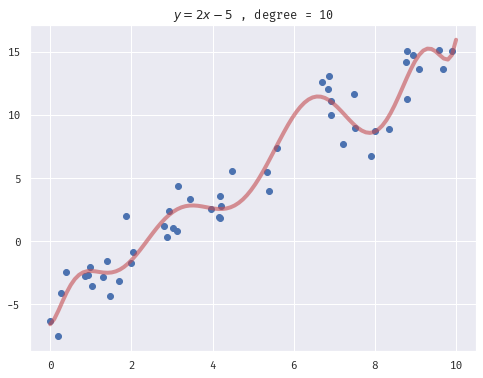

In [9]:
rng=np.random.RandomState(1)
X = 10*rng.rand(50)[:,None]
y = 2 * x - 5 + rng.randn(50) * 2
plt.scatter(X,y)
plt.title(r'$y = 2x - 5$' + " , degree = 10")
X_test = np.linspace(0,10,100)[:,None]
y_test = PolynomialRegression(10).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color='r', alpha=0.6, linewidth=4)
    
plt.savefig("linear-2x-5-degree10.pdf", bbox_inches = 'tight', pad_inches=0)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

-4.997154171106408
[2.05441762]


# Loss Analysis

## one feature and its cost function

$f(x) = w_1 x $

suppose our hypothesis: $\hat{f} (x) = 0.8 x$


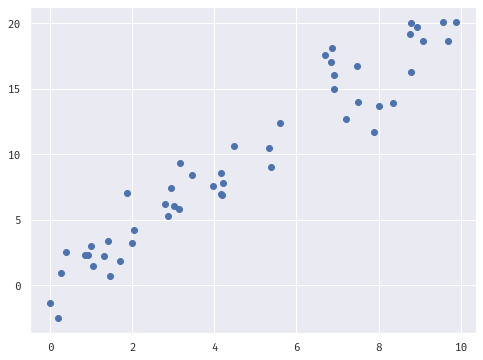

In [11]:
rng=np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * x + rng.randn(50) * 2
plt.scatter(X,y)
plt.savefig("linear-2x.pdf", bbox_inches = 'tight', pad_inches=0)

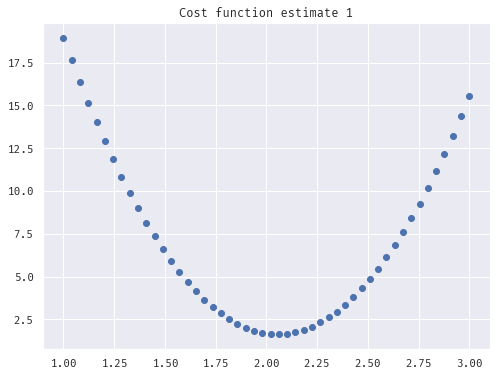

In [12]:
def cost_func(X, y, w):
    n = len(X)
    return 1./(2*n) *  np.sum(( w * X - y)**2) 

w1 = np.linspace(1,3,50)
ycost = []
for w in w1:
    ycost.append(cost_func(X,y,w))

plt.scatter(w1, ycost)
plt.title("Cost function estimate 1")
plt.savefig("linear-2x-cost-func.pdf", bbox_inches = 'tight', pad_inches=0)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X[:,None],y)
model.coef_
model.intercept_

0.0028458288935908627

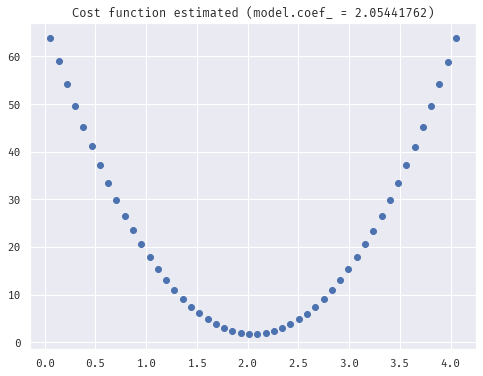

In [14]:
w1 = np.linspace(model.coef_ -2, model.coef_+2, 50)
ycost = []
for w in w1:
    ycost.append(cost_func(X,y,w))

plt.scatter(w1, ycost)
plt.title("Cost function estimated (model.coef_ = 2.05441762)")
plt.savefig("linear-2x-costfunc-mode-fit.pdf", bbox_inches = 'tight', pad_inches=0)

## two features


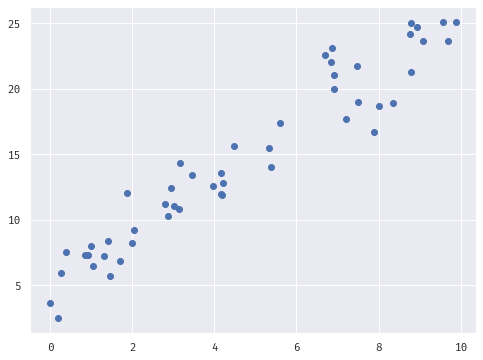

In [15]:
rng=np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * x + 5 + rng.randn(50) * 2
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X[:,None],y)
model.coef_
model.intercept_

plt.savefig("linear-2xplus5.pdf", bbox_inches = 'tight', pad_inches=0)



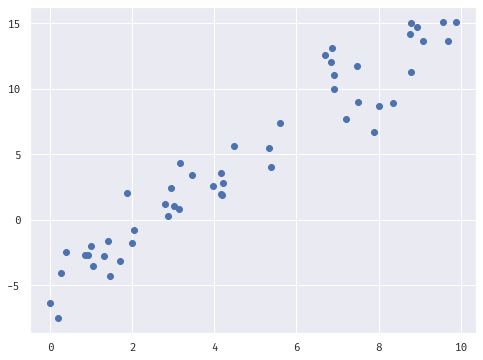

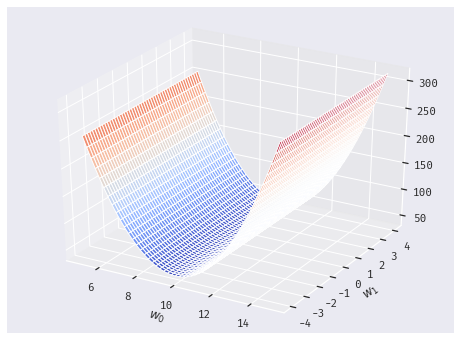

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def cost_func(X, y, w0,w1):
    n = len(X)
    return 1./(2*n) *  np.sum(((w0 + w1 * X) - y)**2) 

def make_data(N):
    rng=np.random.RandomState(1)
    X = 10 * rng.rand(N)
    y = 2 * X -5  + rng.randn(N) * 2
    return X,y

ycost=np.empty(())
X, y = make_data(50)

plt.scatter(X,y)
v0 = np.linspace(5,15,50)
v1 = np.linspace(-4,4,50)
vw0, vw1 = np.meshgrid(v0, v1)
nr, nc = vw0.shape  # get the shape
ycost = np.empty((nr,nc))

for i in range(nr):
    for j in range(nc):
        w0 = vw0[i]
        w1 = vw1[j]
        ycost[i,j] = cost_func(X,y,w0,w1)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(vw0, vw1, ycost, cmap=cm.coolwarm)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.savefig("linear-2x-2features.pdf", bbox_inches = 'tight', pad_inches=0)

# Gradient Descent (single variable)

In [3]:
# ex1data1.txt 
# column 1: population of a city
# column 2: profit of a food truck in that city
import numpy as np 
import matplotlib.pyplot as plt 
data = np.loadtxt("../datasets/ex1data1.txt", delimiter=',')

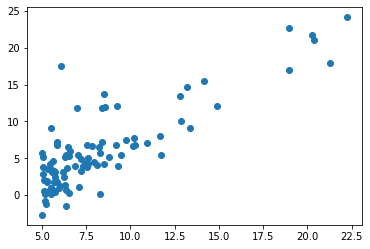

In [4]:
plt.scatter(data[:,0], data[:,1]);

## Implementation

In [5]:
# add a column to X
# n is # of samples

n, m = data.shape
X = data[:,:-1] # all columns except last 
y = data[:,-1] # last columns

# add 1's as a first column in X
y = y.reshape(n,1)
X = np.hstack((np.ones((n,1)), X.reshape(n,m-1)))


In [7]:
# implement gradient descent
#
# 
def compute_cost(X, y, w):
    nx, mx = X.shape
    ny, my = y.shape
    nw, mw = w.shape    
    assert nx == ny
    assert my == 1
    assert nw == mx and mw == 1 
    err = X.dot(w) - y
    return 1.0/(2*nx) * np.sum(err**2)

def normal_equation(X, y):
    from numpy.linalg import inv
    return inv(X.T.dot(X)).dot(X.T).dot(y)


def gradient_descent(X, y, alpha=0.01, num_iters=1500):
    """ return (1) cost history (2) final w """
    nx, mx = X.shape
    ny, my = y.shape
    assert nx == ny
    assert my == 1
    c = np.zeros(num_iters)
    w = np.full((mx, 1), 0.0)  # initialize w
    for i in range(num_iters):
        c[i] = compute_cost(X, y, w)
        err = X.dot(w) - y
        temp0 = w[0] - (alpha / nx) * np.sum( err * X[:,0].reshape(nx,1))
        temp1 = w[1] - (alpha / nx) * np.sum( err * X[:,1].reshape(nx,1))
        w[0] = temp0
        w[1] = temp1
    return c, w


In [8]:
c, w = gradient_descent(X,y)
c[-1], w

(4.483411453374869,
 array([[-3.63029144],
        [ 1.16636235]]))

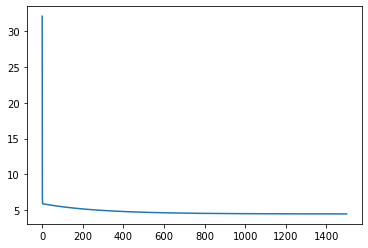

In [9]:
plt.plot(c);

In [10]:
w = normal_equation(X,y)
w

array([[-3.89578088],
       [ 1.19303364]])

# Basis Function Regression

In [24]:
!conda install pdb

Solving environment:failed with initial frozen solve. Retrying with flexible solve.
Solving environment:failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pdb

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [25]:
np.zeros(2)

array([0., 0.])

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)

yfit = poly_model.predict(xfit[:, None])

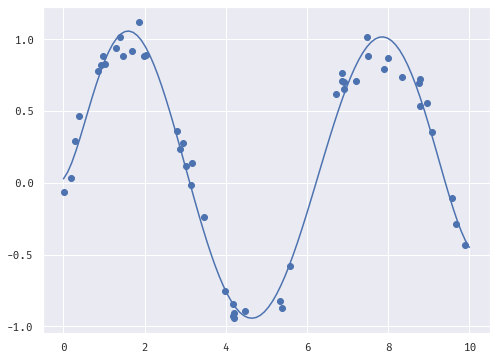

In [27]:
plt.scatter(x,y)
plt.plot(xfit, yfit)
